In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format  
pd.options.display.max_columns = 999
print("complete")

complete


# EDA and Questions
### what sorts of people were more likely to survive?

In [2]:
df = pd.read_csv("../input/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


**Null value check**

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There is a lot of null values in Cabin column and also a bit much in Age.

#### **How many people are survived?**

In [7]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

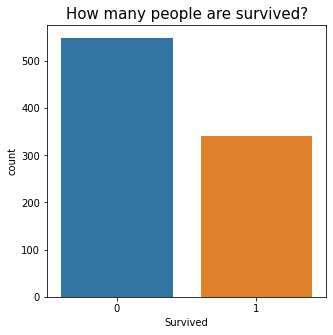

In [8]:
fig, ax = plt.subplots(figsize=(5,5))

sns.countplot(data=df, x='Survived', ax=ax)

ax.set_title("How many people are survived?", size=15)

plt.show()

As we can see, there are more people, who are not survived than who are survived.
* Total 891
* Death 549
* Survived 342

In [9]:
df.corr()['Survived'].sort_values()

Pclass        -0.34
Age           -0.08
SibSp         -0.04
PassengerId   -0.01
Parch          0.08
Fare           0.26
Survived       1.00
Name: Survived, dtype: float64

Here we observe the good correlation between **Fare** and **Survived**. It means that it has to do with **Pclass**.
<br>
But first let's check out **Sex** and **Age** attributes.

#### **Sex vs Survived**

In [10]:
df.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

This shows that:-
* Male
    * Total 577
    * Death 468
    * Survived 109
    * Rate of Death 81.1%
* Female
    * Total 314
    * Death 81
    * Survived 233
    * Rate of Death 34.8%

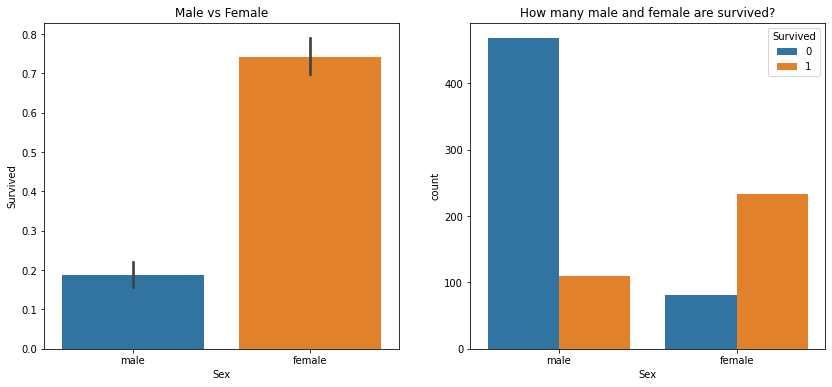

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))

sns.barplot(data=df, x='Sex', y="Survived", ax=ax[0])
ax[0].set_title('Male vs Female')

sns.countplot(data=df, x='Sex', hue='Survived',ax=ax[1])
ax[1].set_title('How many male and female are survived?')

plt.show()

We observe that:-
Female survived much more than male.
<br>
This shows clearly that sex is a very correlative feature of surviving.

#### **Age vs Survived**

In [12]:
df['Age'].describe()

count   714.00
mean     29.70
std      14.53
min       0.42
25%      20.12
50%      28.00
75%      38.00
max      80.00
Name: Age, dtype: float64

In [13]:
male = df[df['Sex'] == 'male']
female = df[df['Sex'] == 'female']

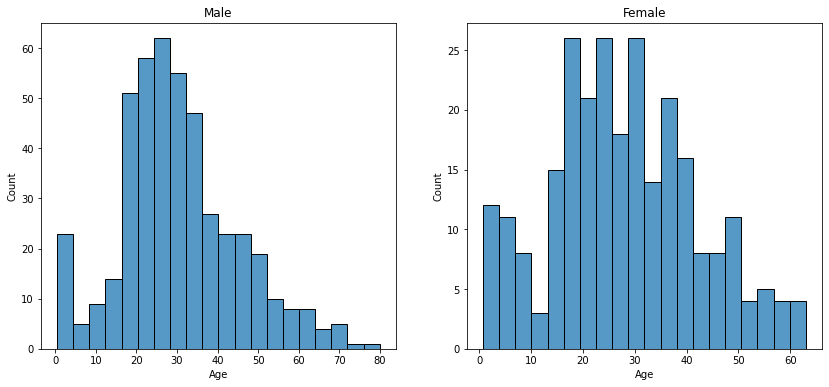

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))

sns.histplot(data=male, x='Age', ax=ax[0], bins=20)
sns.histplot(data=female, x='Age', ax=ax[1], bins=20)

ax[0].set_title("Male")
ax[1].set_title("Female")

plt.show()

This shosw that
* There are males who mostly are between 20 ~ 30
* There are females who mostly are bwtween 18 ~ 35 

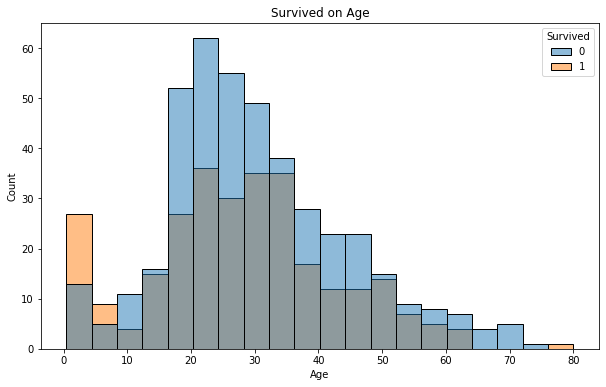

In [15]:
age_dropped = df['Age'].dropna()

fig, ax = plt.subplots(figsize=(10,6))

sns.histplot(data=df, x=age_dropped, hue='Survived', kde=False, ax=ax, bins=20)

ax.set_title('Survived on Age')

plt.show()

We observer that-
* People who are between 20 and 30 are not survived mostly.

#### **Sex, Age vs Survived**

In [16]:
male = df[df['Sex'] == 'male']
male_age_dropped = male['Age'].dropna()

female = df[df['Sex'] == 'female']
female_age_dropped = female['Age'].dropna()

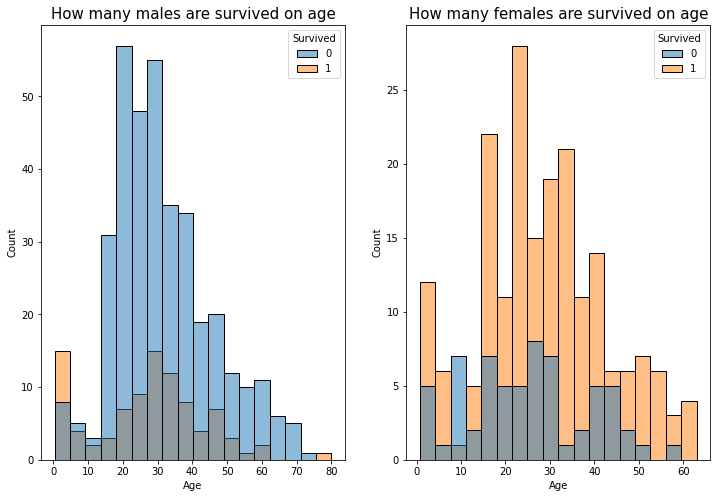

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12,8))

sns.histplot(data=male, x=male_age_dropped, hue='Survived', kde=False, ax=ax[0], bins=18)
sns.histplot(data=female, x=female_age_dropped, hue='Survived', kde=False, ax=ax[1], bins=18)

ax[0].set_title("How many males are survived on age", size=15)
ax[1].set_title("How many females are survived on age", size=15)

plt.show()

We observe that:-
* **Male**
    * age around 30 mostly survived
    * age between 18 ~ 30 mostly not survived
<br>    
* **Female**
    * age between 15 ~ 35 mostly survived
    * age between 10 ~ 30 mostly not survived

#### **Pclass vs Survived**

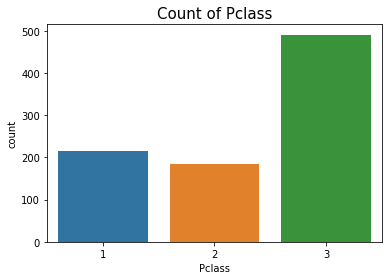

In [18]:
fig, ax = plt.subplots()

sns.countplot(data=df, x='Pclass', ax=ax)

ax.set_title("Count of Pclass", size=15)

plt.show()

This shows that there are much more people who have a class 3 than class 1 or 2

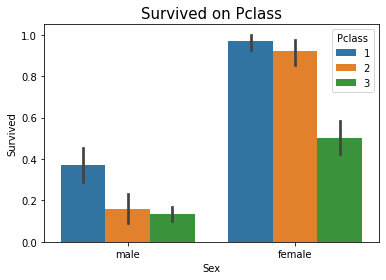

In [19]:
fig, ax = plt.subplots()

sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df, ax=ax)

ax.set_title("Survived on Pclass", size=15)

plt.show()

We see it cleary that people, who had **Pclass 1**, are survived more than people who had **Pclass 2 or 3**.
<br>
But it shows that **Pclass** does not effect about surviving rate by females compared to males.

#### **Embarked vs Survived**

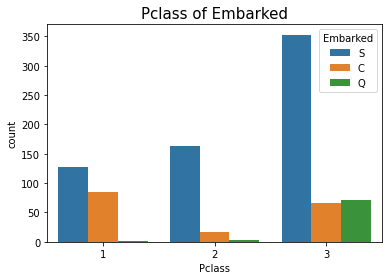

In [20]:
#C = Cherbourg, Q = Queenstown, S = Southampton

fig, ax = plt.subplots()

sns.countplot(data=df, x='Pclass', hue='Embarked', ax=ax)

ax.set_title("Pclass of Embarked", size=15)

plt.show()

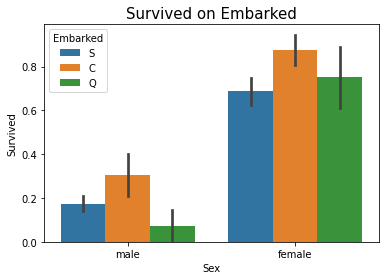

In [21]:
fig, ax = plt.subplots()

sns.barplot(data=df, x='Sex', y='Survived', hue='Embarked', ax=ax)

ax.set_title("Survived on Embarked", size=15)

plt.show()

This shows that the survive rate of **Cherbourg** is the highst even than **South hampton**, where most people come from.

In [22]:
df.groupby("Embarked")['Survived'].value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

Here we can calculate the **survive rate.**
<br>
* **S**: 33.7%
* **Q**: 39%
* **C**: 55.4%

#### **Family vs Survived**

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


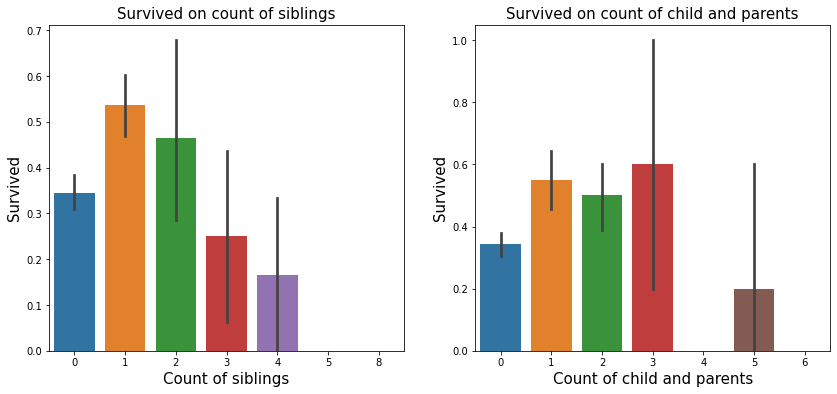

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data=df, x='SibSp', y='Survived', ax=ax[0])
ax[0].set_title('Survived on count of siblings', size=15)
ax[0].set_xlabel("Count of siblings", size=15)
ax[0].set_ylabel("Survived", size=15)

sns.barplot(data=df, x='Parch', y='Survived', ax=ax[1])
ax[1].set_title("Survived on count of child and parents", size=15)
ax[1].set_xlabel("Count of child and parents", size=15)
ax[1].set_ylabel("Survived", size=15)

plt.show()

We observe that the families of many members are mostly not survived, while alone or the familes of just only 1 or 2 memebrs are mostly survived.

In [25]:
df['Family_total'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_total
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,0


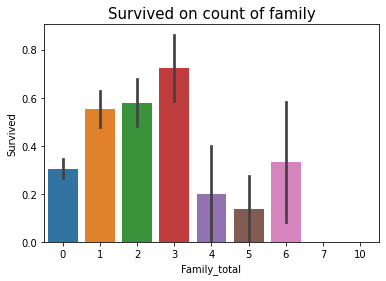

In [26]:
fig, ax = plt.subplots()

sns.barplot(data=df, x='Family_total', y='Survived', ax=ax)

ax.set_title("Survived on count of family", size=15)

plt.show()

The families, which have more than 4 members are mostly not survived.

# Conclusion

Back to the main question, **what sorts of people were more likely to survive?**
<br>
The answer is -
* Females
    * age between 15 ~ 35
    * having Pclass 1
    * embarked from Cherbourg
    * having only 1 ~ 3 family members

But then **what sorts of people were less likely to survived?**
<br>
The answer is -
* Males
    * age between 18 ~ 30
    * having Pclass 3
    * embarked from South hampton
    * having a big family (over 4 members)